In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
df = pd.read_csv('Download Data - INDEX_US_S&P US_SPX-3.csv')

In [11]:
df.describe()

,Date,Open,High,Low,Close
count,252,252,252,252,252
unique,252,252,251,252,252
top,03/23/2023,"3,959.21","4,159.77","3,919.05","3,948.72"
freq,1,1,2,1,1


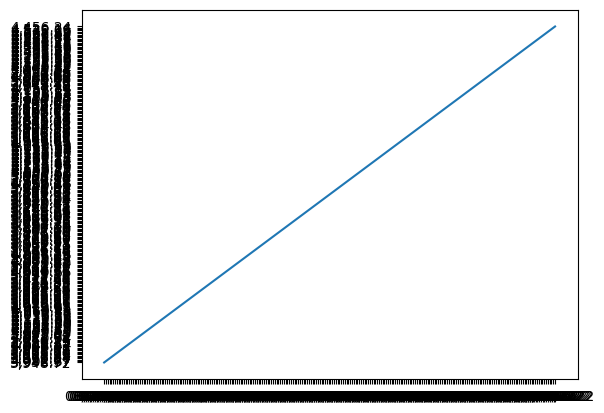

In [10]:
plt.plot(df['Date'], df['Close'])

In [38]:
df['Date'] = pd.to_datetime(df['Date'])
df['Close'] = df['Close'].astype(str)
df['Close'] = df['Close'].str.replace(',', '')
df['Close'] = df['Close'].astype(float)

In [39]:
df= df.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Close
251,2022-03-23,"4,493.10","4,501.07","4,455.81",4456.24
250,2022-03-24,"4,469.98","4,520.58","4,465.17",4520.16
249,2022-03-25,"4,522.91","4,546.03","4,501.07",4543.06
248,2022-03-28,"4,541.09","4,575.65","4,517.69",4575.52
247,2022-03-29,"4,602.86","4,637.30","4,589.66",4631.60


In [40]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=df['Date'],y=df['Close'], mode='lines'))
fig.show()

In [41]:
import numpy as np
df['Log returns'] = np.log(df['Close']/df['Close'].shift())

In [42]:
df['Log returns'].std()

0.014711783306911327

In [45]:
volatility = df['Log returns'].std()*252**.5
volatility


0.23354231983415283

Text(0.5, 1.0, 'AAPL volatility: ” + str_vol + “%')

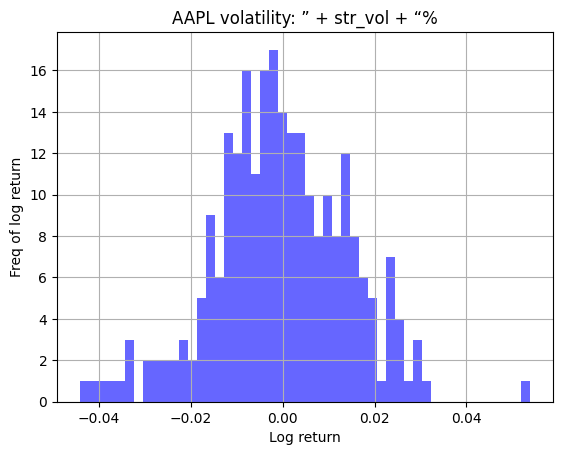

In [50]:
str_vol = str(round(volatility, 4)*100)

fig, ax = plt.subplots()
df['Log returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel('Log return')
ax.set_ylabel('Freq of log return')
ax.set_title('AAPL volatility: ” + str_vol + “%')